# Setup

In [11]:
project_dir = joinpath(homedir(), "Documents/Repositories/pilot_paper")

"/Users/brettell/Documents/Repositories/pilot_paper"

In [12]:
Pkg.activate(project_dir)
Pkg.instantiate()

 Activating environment at `~/Documents/Repositories/pilot_paper/Project.toml`


In [2]:
using Pkg
Pkg.add("Plotly")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
No Changes to `~/Documents/Repositories/pilot_paper/Project.toml`
No Changes to `~/Documents/Repositories/pilot_paper/Manifest.toml`


In [24]:
using CSV, DataFrames, Glob

## Pull data using `gsutil`

In [14]:
target_samples = ["20190611_1331_icab_icab_R_q2_novel_object"]

1-element Array{String,1}:
 "20190611_1331_icab_icab_R_q2_novel_object"

In [15]:
target_samples = ["20190611_1331_icab_icab_R_q2_novel_object", "20190611_1331_icab_icab_R_q3_novel_object"]
output_dir = ["/Users/brettell/Documents/Data/20210216_pilot_data_tmp"]

1-element Array{String,1}:
 "/Users/brettell/Documents/Data/20210216_pilot_data_tmp"

In [34]:
for sample in target_samples
    run(`gsutil cp
            gs://medaka-video-store/results/session_$sample/trajectories_wo_gaps/trajectories_wo_gaps.trajectories.csv 
            $output_dir/$sample.csv`)
end

Copying gs://medaka-video-store/results/session_20190611_1331_icab_icab_R_q2_novel_object/trajectories_wo_gaps/trajectories_wo_gaps.trajectories.csv...
- [1 files][  1.8 MiB/  1.8 MiB]                                                
Operation completed over 1 objects/1.8 MiB.                                      
Copying gs://medaka-video-store/results/session_20190611_1331_icab_icab_R_q3_novel_object/trajectories_wo_gaps/trajectories_wo_gaps.trajectories.csv...
- [1 files][  1.8 MiB/  1.8 MiB]                                                
Operation completed over 1 objects/1.8 MiB.                                      


## Read in data

In [26]:
files = Glob.glob("*.csv", output_dir[1])


2-element Array{String,1}:
 "/Users/brettell/Documents/Data/20210216_pilot_data_tmp/20190611_1331_icab_icab_R_q2_novel_object.csv"
 "/Users/brettell/Documents/Data/20210216_pilot_data_tmp/20190611_1331_icab_icab_R_q3_novel_object.csv"

In [27]:
dfs = CSV.read.(files, DataFrame)

2-element Array{DataFrame,1}:
 18566×4 DataFrame
   Row │ # x1     y1       x2        y2       
       │ Float64  Float64  Float64   Float64  
───────┼──────────────────────────────────────
     1 │ 288.47   34.5556   66.3673   59.5908
     2 │ 290.01   34.6084   66.3673   59.5908
     3 │ 290.09   34.6197   66.3673   59.5908
     4 │ 291.05   34.7441   66.218    59.6831
     5 │ 292.142  34.6331   66.005    59.703
     6 │ 292.554  34.6517   66.005    59.703
     7 │ 293.992  34.6501   65.834    59.6467
     8 │ 295.006  34.584    65.7683   59.5936
     9 │ 295.295  34.4722   65.3573   59.5922
    10 │ 296.515  34.4032   65.5282   59.7282
    11 │ 297.163  34.422    65.4702   59.6641
   ⋮   │    ⋮        ⋮        ⋮         ⋮
 18557 │ 179.326  53.9615  320.712   138.254
 18558 │ 179.355  54.0     320.23    137.027
 18559 │ 179.205  53.7965  319.399   134.834
 18560 │ 179.282  53.8422  319.117   133.577
 18561 │ 179.282  53.8422  318.925   132.264
 18562 │ 179.342  53.8861  318.861   13

## Rename dfs

In [28]:
colnames = ["x1","y1","x2", "y2"]

for df in dfs
    rename!(df, Symbol.(colnames))
end    

## Add sample as column

In [29]:
# Get sample names
samples = replace.(basename.(files), r"\.csv$"=>"")

2-element Array{String,1}:
 "20190611_1331_icab_icab_R_q2_novel_object"
 "20190611_1331_icab_icab_R_q3_novel_object"

In [30]:
# Add as column
for (i, df) in enumerate(dfs)
    df[!, :sample] .= samples[i]
end    

## Add other metadata

In [59]:
split.(samples, "_")

2-element Array{Array{SubString{String},1},1}:
 ["20190611", "1331", "icab", "icab", "R", "q2", "novel", "object"]
 ["20190611", "1331", "icab", "icab", "R", "q3", "novel", "object"]

## Add frame

In [31]:
for df in dfs
    df[!, :frame] = rownumber.(eachrow(df))
end    

## Plot

### Gadfly

In [43]:
using Gadfly

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1278


In [44]:
p1 = Gadfly.plot(dfs[1], x = :x1, y = :y1, Geom.path, Coord.cartesian(fixed = true))
p2 = Gadfly.plot(dfs[1], x = :x2, y = :y2, Geom.path, Coord.cartesian(fixed = true))
p3 = Gadfly.plot(dfs[2], x = :x1, y = :y1, Geom.path, Coord.cartesian(fixed = true))
p4 = Gadfly.plot(dfs[2], x = :x2, y = :y2, Geom.path, Coord.cartesian(fixed = true))
gridstack([p1 p2; p3 p4])

LoadError: type RObject has no field cartesian

In [23]:
p1 = Gadfly.plot(dfs[1], x = :x1, y = :y1, color = :frame, Geom.path, Coord.cartesian(fixed = true))
p2 = Gadfly.plot(dfs[1], x = :x2, y = :y2, color = :frame, Geom.path, Coord.cartesian(fixed = true))
p3 = Gadfly.plot(dfs[2], x = :x1, y = :y1, color = :frame, Geom.path, Coord.cartesian(fixed = true))
p4 = Gadfly.plot(dfs[2], x = :x2, y = :y2, color = :frame, Geom.path, Coord.cartesian(fixed = true))
gridstack([p1 p2; p3 p4])

LoadError: UndefVarError: dfs not defined

Colour doesn't work. 

### ggplot2

In [35]:
using RCall
@rlibrary ggplot2
@rlibrary plotly

┌ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1278


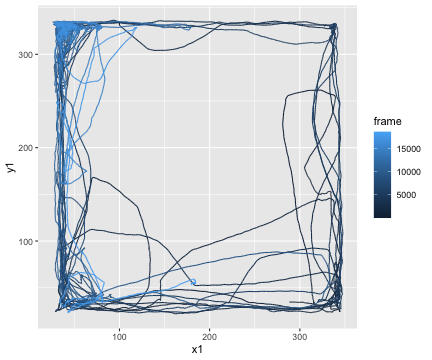

RObject{VecSxp}


In [36]:
out = ggplot(dfs[1]) +
    geom_path(aes(x = :x1, y = :y1, colour = :frame))


In [41]:
R"library(ggplot2)"
R"library(plotly)"
R"ggplotly(out)"

InterruptException: InterruptException:

`ggplotly` doesn't work.

### Plotly

In [41]:
using Plotly

In [42]:
?Plotly.set_credentials_file

```
set_credentials_file(input_creds::AbstractDict)
```

Save Plotly endpoint configuration as JSON key-value pairs in userhome/.plotly/.credentials. This includes username and api_key.


In [43]:
Plotly.set_credentials_file(Dict("username"=>"ian_brettell","api_key"=>"tY9nKs03Pg7bTswqnLCg"))

60

In [44]:
?Plotly.plot

No documentation found.

`PlotlyJS.plot` is a `Function`.

```
# 1 method for generic function "plot":
[1] plot(args...; options, kwargs...) in PlotlyJS at /Users/brettell/.julia/packages/PlotlyJS/m2Lzd/src/display.jl:144
```


In [30]:
trace1 = Dict(
  "x" => [1, 2, 3, 4],
  "y" => [10, 15, 13, 17],
  "type" => "scatter"
)

Dict{String,Any} with 3 entries:
  "x"    => [1, 2, 3, 4]
  "type" => "scatter"
  "y"    => [10, 15, 13, 17]

In [31]:
trace2 = [
  "x" => [1, 2, 3, 4],
  "y" => [16, 5, 11, 9],
  "type" => "scatter"
]

3-element Array{Pair{String,Any},1}:
    "x" => [1, 2, 3, 4]
    "y" => [16, 5, 11, 9]
 "type" => "scatter"

In [38]:
?Plotly.plot

No documentation found.

`PlotlyJS.plot` is a `Function`.

```
# 1 method for generic function "plot":
[1] plot(args...; options, kwargs...) in PlotlyJS at /Users/brettell/.julia/packages/PlotlyJS/m2Lzd/src/display.jl:144
```


In [36]:
Plotly.plot([trace2])

LoadError: MethodError: no method matching PlotlyBase.Plot(::Array{Array{Pair{String,Any},1},1})
Closest candidates are:
  PlotlyBase.Plot(::AbstractArray{T,1}, !Matched::AbstractArray{T,2} where T) where T<:(AbstractArray{T,1} where T) at /Users/brettell/.julia/packages/PlotlyBase/NxSlF/src/convenience_api.jl:30
  PlotlyBase.Plot(::AbstractArray{T,1}, !Matched::AbstractArray{T,2} where T, !Matched::Layout; style, kwargs...) where T<:(AbstractArray{T,1} where T) at /Users/brettell/.julia/packages/PlotlyBase/NxSlF/src/convenience_api.jl:30
  PlotlyBase.Plot(; style) at /Users/brettell/.julia/packages/PlotlyBase/NxSlF/src/PlotlyBase.jl:56
  ...

In [45]:
trace1 = Dict(
  "x" => [1, 2, 3, 4],
  "y" => [10, 15, 13, 17],
  "type" => "scatter"
)
trace2 = [
  "x" => [1, 2, 3, 4],
  "y" => [16, 5, 11, 9],
  "type" => "scatter"
]

response = Plotly.plot([trace1, trace2])
#plot_url = response["url"]

LoadError: MethodError: no method matching PlotlyBase.Plot(::Array{Any,1})
Closest candidates are:
  PlotlyBase.Plot(; style) at /Users/brettell/.julia/packages/PlotlyBase/NxSlF/src/PlotlyBase.jl:56
  PlotlyBase.Plot(!Matched::AbstractArray{var"#s20",1} where var"#s20"<:AbstractTrace) at /Users/brettell/.julia/packages/PlotlyBase/NxSlF/src/PlotlyBase.jl:60
  PlotlyBase.Plot(!Matched::TT, !Matched::TL, !Matched::TF, !Matched::Base.UUID, !Matched::Style) where {TT<:(AbstractArray{var"#s54",1} where var"#s54"<:AbstractTrace), TL<:PlotlyBase.AbstractLayout, TF<:(AbstractArray{var"#s55",1} where var"#s55"<:PlotlyFrame)} at /Users/brettell/.julia/packages/PlotlyBase/NxSlF/src/PlotlyBase.jl:35
  ...

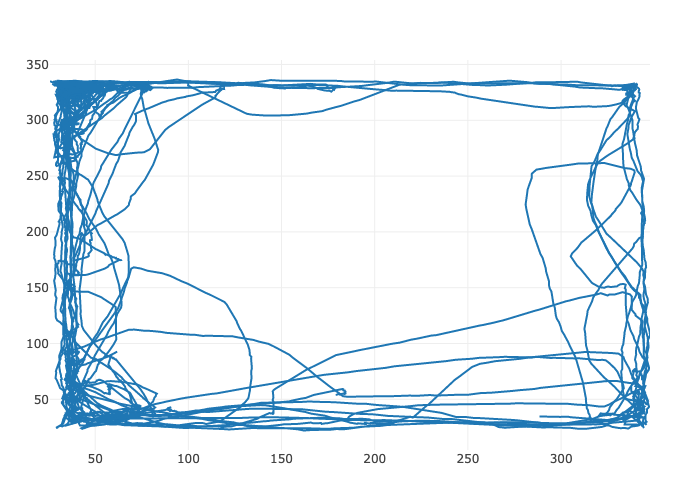

In [52]:
Plotly.plot([Plotly.scatter(x=dfs[1][!, :x1],
                            y=dfs[1][!, :y1])])

Too laborious.